In [27]:
import numpy as np

import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# interpolate插入
from scipy.interpolate import lagrange

In [29]:
# 线性插值
from scipy import interp

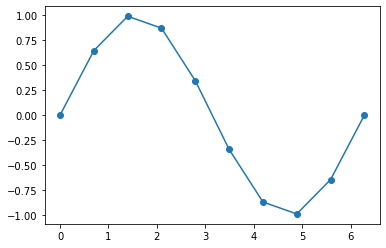

In [25]:
x = np.linspace(0,2*np.pi,10)

y = np.sin(x)

# marker='o'显示10个点位置
plt.plot(x,y,marker='o')

In [18]:
X = np.linspace(0,2*np.pi,40)

#线性插值
Y = interp(X,x,y)

D:\anaconda3.2020.02\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  after removing the cwd from sys.path.


In [19]:
Y

array([ 0.00000000e+00,  1.48335602e-01,  2.96671204e-01,  4.45006807e-01,
        5.93342409e-01,  6.95406093e-01,  7.74333819e-01,  8.53261544e-01,
        9.32189269e-01,  9.75670649e-01,  9.48259338e-01,  9.20848027e-01,
        8.93436715e-01,  8.66025404e-01,  7.45101113e-01,  6.24176822e-01,
        5.03252531e-01,  3.82328240e-01,  2.36783176e-01,  7.89277254e-02,
       -7.89277254e-02, -2.36783176e-01, -3.82328240e-01, -5.03252531e-01,
       -6.24176822e-01, -7.45101113e-01, -8.66025404e-01, -8.93436715e-01,
       -9.20848027e-01, -9.48259338e-01, -9.75670649e-01, -9.32189269e-01,
       -8.53261544e-01, -7.74333819e-01, -6.95406093e-01, -5.93342409e-01,
       -4.45006807e-01, -2.96671204e-01, -1.48335602e-01, -2.44929360e-16])

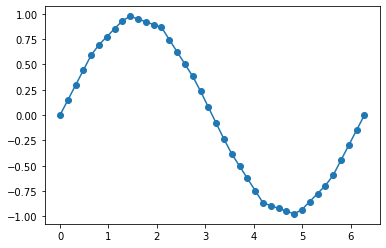

In [26]:
# marker='o'可见40个点是什么样的
plt.plot(X,Y,marker='o')

In [155]:
# 饭店的销售额，跟是否周六日有很大关系
sale = pd.read_excel('./catering_sale.xls')
sale

,日期,销量
0,2015-03-01,51.0
1,2015-02-28,2618.2
2,2015-02-27,2608.4
3,2015-02-26,2651.9
4,2015-02-25,3442.1
...,...,...
196,2014-08-06,2915.8
197,2014-08-05,2618.1
198,2014-08-04,2993.0
199,2014-08-03,3436.4


In [156]:
sale['销量'][(sale['销量']<400)|(sale['销量']>6000)]=np.NaN

D:\anaconda3.2020.02\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [157]:
sale

,日期,销量
0,2015-03-01,NaN
1,2015-02-28,2618.2
2,2015-02-27,2608.4
3,2015-02-26,2651.9
4,2015-02-25,3442.1
...,...,...
196,2014-08-06,2915.8
197,2014-08-05,2618.1
198,2014-08-04,2993.0
199,2014-08-03,3436.4


In [158]:
sale['销量'][[1,2]]

1    2618.2
2    2608.4
Name: 销量, dtype: float64

In [138]:
sale.columns

Index(['日期', '销量'], dtype='object')

In [159]:
sale['销量'].isnull()

0       True
1      False
2      False
3      False
4      False
       ...  
196    False
197    False
198    False
199    False
200    False
Name: 销量, Length: 201, dtype: bool

In [160]:
# s 数据，n这个位置，空数据
# k 向前5个，向后5个
def fill_lagrange(s,n,k=5):
    #取多个值使用列表
    y = s[list(range(n-k,n))+list(range(n+1,n+1+k))]
    # 剔除y中的空值
    y = y[y.notnull()]
    
    # lagrange() 内部是array-like
    return lagrange(y.index,list(y))(n)

In [161]:
# 视频上可以，此处不行了，估计新版本用老办法不行了
for i in sale.columns:
#   j相当于行索引    
    for j in range(sale[i].size):
        if sale[i].isnull()[j]:
#             使用拉格朗日进行填充
#              定义方法，进行填充
            sale[i][j] = fill_lagrange(sale[i],j)

KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

In [152]:
sale

,日期,销量
0,2015-03-01,NaN
1,2015-02-28,2618.2
2,2015-02-27,2608.4
3,2015-02-26,2651.9
4,2015-02-25,3442.1
...,...,...
196,2014-08-06,2915.8
197,2014-08-05,2618.1
198,2014-08-04,2993.0
199,2014-08-03,3436.4


In [67]:
sale.loc[0]

日期    2015-03-01 00:00:00
销量                    NaN
Name: 0, dtype: object

In [74]:
range(1,6)

range(1, 6)

In [73]:
list(range(1,6))

[1, 2, 3, 4, 5]

In [75]:
list(range(7,12))

[7, 8, 9, 10, 11]

In [76]:
list(range(1,6))+list(range(7,12))

[1, 2, 3, 4, 5, 7, 8, 9, 10, 11]

In [106]:
np.array([1,2,3])

array([1, 2, 3])